# 深層学習　畳み込みニューラルネットワーク２

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import copy
from collections import defaultdict

In [2]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print(X_train.shape) # (60000, 28, 28)
print(X_test.shape) # (10000, 28, 28)
print(X_train[0].dtype) # uint8
print(X_train[0])


(60000, 28, 28)
(10000, 28, 28)
uint8
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0 

In [4]:
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

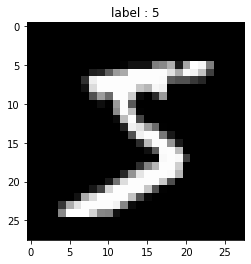

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
index = 0
image = X_train[index].reshape(28,28)
#X_train[index]: (784,)
# image: (28, 28)
plt.imshow(image, 'gray', vmin = 0, vmax = 255)
plt.title('label : {}'.format(y_train[index]))
plt.show()

In [6]:
image.shape

(28, 28)

In [7]:
# from sklearn.preprocessing import OneHotEncoder
# enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
# y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
# y_test_one_hot = enc.transform(y_test[:, np.newaxis])
# print(y_train.shape) # (60000,)
# print(y_train_one_hot.shape) # (60000, 10)
# print(y_train_one_hot.dtype) # float64

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)#y_train_one_hot
print(X_train.shape) # (48000, 784)
print(X_val.shape) # (12000, 784)

(48000, 784)
(12000, 784)


In [9]:
#X_train.reshape(48000,28,28)
#a = X_train.reshape([48000,1,28,28])
#a.shape

In [10]:
X_train = X_train.reshape([-1,1,28,28])
X_train.shape

(48000, 1, 28, 28)

In [11]:
X_val = X_val.reshape([-1,1,28,28])
X_val.shape

(12000, 1, 28, 28)

In [12]:
y_train.shape

(48000,)

# 【問題1】2次元畳み込み層の作成

# 【問題2】2次元畳み込み後の出力サイズ

In [13]:
class Co:
    def __init__(self, W):
        self.W = W
        

    def forward(self, x):
        FN,FH, FW, C  = self.W.shape#FNはフィルターの個数、Cはチャネル、FHはフィルターの高さ、FWはフィルターの幅
        H, W, C= x.shape
        out=np.zeros(H-FH+1, W-FW+1, FN)# out用に0で配列を作る（空の入れ物）
        for m in range(FN):#フィルター数回す
            for i in range(H-FH+1):#xの縦の回数
                for j in range(W-FW+1):#xの横の回数
                    out[i,j,m]=np.sum(x[i:i+FH,j:j+FW, :])*self.W[m, :, :, :]#範囲のxとフィルターをアダマール積(全てのチャネルを同時)、outに格納するb
        return out

In [14]:
# co = Co(ww)
# co.forward(X_train)

# im2col

In [15]:
ww = np.random.randn(1,3,7,7)
ww

array([[[[-4.94990559e-01,  1.43132471e+00, -2.26636035e+00,
          -9.78908203e-01,  5.19983036e-01, -1.35741288e-01,
           9.09081508e-01],
         [-1.00268012e+00,  1.16241590e+00,  1.36457966e+00,
           2.09225878e+00, -2.19333546e-01,  1.13940991e-01,
           2.29335417e-01],
         [ 2.69914648e-02,  5.22723420e-01,  7.16762973e-01,
          -2.91193820e-02, -1.11398951e+00,  8.28073238e-01,
           1.63293453e+00],
         [ 5.14889878e-01,  7.10447659e-01,  2.60697890e-01,
           5.61140758e-01,  1.84334588e-02, -1.79807505e+00,
           4.97122024e-02],
         [ 1.89669121e+00,  9.91423627e-01,  3.78861851e-03,
           4.38631364e-01,  1.31741796e+00, -1.71256787e-02,
          -6.49923126e-01],
         [-1.81125454e+00,  5.14260326e-01, -3.70710525e-01,
          -9.25299600e-01, -1.11549911e+00, -1.27461120e+00,
          -1.25699558e+00],
         [-7.74834636e-01, -7.41621532e-01, -8.27864329e-01,
          -8.91731094e-01, -9.27285853e

In [16]:
def im2col(input_data, filter_h, filter_w, stride=1, pad=0):
    """
    Parameters
    ----------
    input_data : (データ数, チャンネル, 高さ, 幅)の4次元配列からなる入力データ
    filter_h : フィルターの高さ
    filter_w : フィルターの幅
    stride : ストライド
    pad : パディング
    Returns
    -------
    col : 2次元配列
    """
    N, C, H, W = input_data.shape
    out_h = (H + 2*pad - filter_h)//stride + 1
    out_w = (W + 2*pad - filter_w)//stride + 1

    img = np.pad(input_data, [(0,0), (0,0), (pad, pad), (pad, pad)], 'constant')
    col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))

    for y in range(filter_h):
        y_max = y + stride*out_h
        for x in range(filter_w):
            x_max = x + stride*out_w
            col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]

    col = col.transpose(0, 4, 5, 1, 2, 3).reshape(N*out_h*out_w, -1)
    return col

In [17]:
def col2im(col, input_shape, filter_h, filter_w, stride=1, pad=0):
    """
    Parameters
    ----------
    col :
    input_shape : 入力データの形状（例：(10, 1, 28, 28)）
    filter_h :
    filter_w
    stride
    pad
    Returns
    -------
    """
    N, C, H, W = input_shape
    out_h = (H + 2*pad - filter_h)//stride + 1
    out_w = (W + 2*pad - filter_w)//stride + 1
    col = col.reshape(N, out_h, out_w, C, filter_h, filter_w).transpose(0, 3, 4, 5, 1, 2)

    img = np.zeros((N, C, H + 2*pad + stride - 1, W + 2*pad + stride - 1))
    for y in range(filter_h):
        y_max = y + stride*out_h
        for x in range(filter_w):
            x_max = x + stride*out_w
            img[:, :, y:y_max:stride, x:x_max:stride] += col[:, :, y, x, :, :]

    return img[:, :, pad:H + pad, pad:W + pad]

In [18]:
im = im2col(ww, 5, 5, stride=1, pad=0 )
im.shape


(9, 75)

In [19]:
kernel_test = np.random.rand(1,3, 5, 5)
kernel_test.shape

(1, 3, 5, 5)

In [20]:
kernel_test = kernel_test.reshape(1,-1)
al = np.sum(kernel_test, axis=0)
al

array([0.43601788, 0.09026471, 0.27687403, 0.93912772, 0.44186516,
       0.94124479, 0.90260946, 0.04465962, 0.15997368, 0.17532708,
       0.17614719, 0.75244227, 0.240837  , 0.05168799, 0.7112137 ,
       0.29805318, 0.10482552, 0.84675412, 0.57182893, 0.64071162,
       0.44002724, 0.27821239, 0.53791728, 0.33813929, 0.86208225,
       0.86143669, 0.61044727, 0.40479552, 0.57852602, 0.49861574,
       0.07949181, 0.27773288, 0.8944753 , 0.79850098, 0.88962057,
       0.89965738, 0.85096269, 0.16207776, 0.23681319, 0.43129419,
       0.10001826, 0.74531051, 0.86506435, 0.28835424, 0.35242808,
       0.07753216, 0.72764124, 0.19785259, 0.90161522, 0.62041457,
       0.79994915, 0.84648568, 0.15833241, 0.69147056, 0.83560033,
       0.33193936, 0.22862235, 0.41292677, 0.7486031 , 0.40679318,
       0.72784345, 0.57939007, 0.54024125, 0.48953942, 0.69219528,
       0.44450479, 0.0725443 , 0.07782967, 0.81374097, 0.57841702,
       0.0905683 , 0.67879425, 0.57983227, 0.55914002, 0.55063

In [21]:
kernel_test

array([[0.43601788, 0.09026471, 0.27687403, 0.93912772, 0.44186516,
        0.94124479, 0.90260946, 0.04465962, 0.15997368, 0.17532708,
        0.17614719, 0.75244227, 0.240837  , 0.05168799, 0.7112137 ,
        0.29805318, 0.10482552, 0.84675412, 0.57182893, 0.64071162,
        0.44002724, 0.27821239, 0.53791728, 0.33813929, 0.86208225,
        0.86143669, 0.61044727, 0.40479552, 0.57852602, 0.49861574,
        0.07949181, 0.27773288, 0.8944753 , 0.79850098, 0.88962057,
        0.89965738, 0.85096269, 0.16207776, 0.23681319, 0.43129419,
        0.10001826, 0.74531051, 0.86506435, 0.28835424, 0.35242808,
        0.07753216, 0.72764124, 0.19785259, 0.90161522, 0.62041457,
        0.79994915, 0.84648568, 0.15833241, 0.69147056, 0.83560033,
        0.33193936, 0.22862235, 0.41292677, 0.7486031 , 0.40679318,
        0.72784345, 0.57939007, 0.54024125, 0.48953942, 0.69219528,
        0.44450479, 0.0725443 , 0.07782967, 0.81374097, 0.57841702,
        0.0905683 , 0.67879425, 0.57983227, 0.55

In [22]:
kernel_test.shape

(1, 75)

In [23]:
forwardout_2d = np.dot(im, kernel_test.T)
forwardout_2d

array([[ 4.07166395],
       [ 7.91279183],
       [ 5.32229173],
       [ 4.06023738],
       [ 5.61275487],
       [-0.8812172 ],
       [-1.95342895],
       [-0.18016337],
       [-1.00999304]])

In [24]:
forwardout_2d.shape

(9, 1)

In [25]:
ou =forwardout_2d.reshape(1, 3, 3, -1).transpose(0, 3, 1, 2)
ou

array([[[[ 4.07166395,  7.91279183,  5.32229173],
         [ 4.06023738,  5.61275487, -0.8812172 ],
         [-1.95342895, -0.18016337, -1.00999304]]]])

#バック

In [26]:
dou = ou.transpose(0,2,3,1).reshape(-1,1)
dou.shape

(9, 1)

In [27]:
np.sum(dou,axis=0)#?

array([22.95493719])

In [28]:
Conv2d(ww, )

NameError: name 'Conv2d' is not defined

In [67]:
class Conv2d:
    def __init__(self,W, b, stride = 1, pad = 0):
        self.W = W
        self.b = b
        self.stride = stride
        self.pad = pad
        
        self.x = None
        self.col = None
        self.col_W = None
        
        #重みとバイアス更新
        self.dW = None
        self.db = None
        
    def forward(self, x):
        #FN=フィルタの個数、C=チャンネル数、FH＝kernelの縦、FW＝kernelの横
        FN, C, FH, FW = self.W.shape
        N, C, H, W = x.shape
        out_h = 1 + int((H+2*self.pad - FH) / self.stride) #問２答え
        out_w = 1+ int((W + 2*self.pad - FW) / self.stride) # 問２答え
        
        col = im2col(x, FH, FW, self.stride, self.pad)
        col_W = self.W.reshape(FN, -1).T #(1, 75)を.T
        
        out = np.dot(col, col_W) + self.b #２次元
        out = out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2)#N=データ数(塊)　まずデータ数Nを揃える
        # (N, FN, OH, OW)にしたい、CNNはデータを４次元で格納するからoutをreshape
        #(N, out_h, out_w, -1=FN) = (0, 1, 2, 3)→(0, 3, 1, 2) = (N, FN, OH, OW)
        
        self.x = x
        self.col = col
        self.col_W = col_W
        
        return out
    
    def backward(self, dout):
        FN, C, FH, FW = self.W.shape
        dout = dout.transpose(0,2,3,1).reshape(-1,FN)#(N, FN, OH, OW)→(N, OH, OW, FN)#(9, 1)
        
        self.db = np.sum(dout, axis = 0)#???
        self.dW = np.dot(self.col.T, dout)
        self.dW = self.dW.transpose(1, 0).reshape(FN, C, FH, FW)#Wを更新
        
        dcol = np.dot(dout, self.col_W.T) 
        dx = (dcol, self.x.shape, FH, FW, self.stride, self.pad)
        
        return dx
        

In [68]:
class Convolution:
    def __init__(self, W, b, stride=1, pad=0):
        self.W = W
        self.b = b
        self.stride = stride
        self.pad = pad
        
        # 中間データ（backward時に使用）
        self.x = None   
        self.col = None
        self.col_W = None
        
        # 重み・バイアスパラメータの勾配
        self.dW = None
        self.db = None

    def forward(self, x):
        FN, C, FH, FW = self.W.shape
        N, C, H, W = x.shape
        out_h = 1 + int((H + 2*self.pad - FH) / self.stride) 
        out_w = 1 + int((W + 2*self.pad - FW) / self.stride)

        col = im2col(x, FH, FW, self.stride, self.pad)
        col_W = self.W.reshape(FN, -1).T

        out = np.dot(col, col_W) + self.b #2次元として出力
        out = out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2)

        self.x = x
        self.col = col
        self.col_W = col_W

        return out

    def backward(self, dout):
        FN, C, FH, FW = self.W.shape
        dout = dout.transpose(0,2,3,1).reshape(-1, FN) 

        self.db = np.sum(dout, axis=0) #???????
        self.dW = np.dot(self.col.T, dout)  
        self.dW = self.dW.transpose(1, 0).reshape(FN, C, FH, FW) 

        dcol = np.dot(dout, self.col_W.T)
        dx = col2im(dcol, self.x.shape, FH, FW, self.stride, self.pad)

        return dx


# 【問題3】最大プーリング層の作成

In [69]:
class MaxPool2D:
    def __init__(self, h_pool, w_pool, stride = 2, pad = 0): #h_pool, w_poolはプーリング適用領域 被らないようにスライド
        self.h_pool = h_pool #2
        self.w_pool = w_pool #2
        self.stride = stride #1
        self.pad = pad #0
        
        self.x = None
        self.arg_max = None 
     
    def forward(self, x):
        N, C, H, W = x.shape
        out_h = int(1 + (H - self.h_pool) / self.stride) #(1,3,8,8) 4 
        out_w = int(1 + (W - self.w_pool) / self.stride) #(1,3,8,8) 4 
        
        col = im2col(x, self.h_pool, self.w_pool, self.stride, self.pad)
        col = col.reshape(-1, self.h_pool*self.w_pool)#(16, 4)*3チャンネル(48,4)
        
        arg_max = np.argmax(col, axis=1) #index抽出48 backwardの時に活躍,maxだった要素のindexだけを返してそれ以外は０
        out = np.max(col, axis=1)
        out = out.reshape(N, out_h, out_w, C).transpose(0, 3, 1, 2)
        
        self.x = x
        self.arg_max = arg_max
        
        return out
    
    def backward(self, dout):
        dout = dout.transpose(0, 2, 3, 1)#flattenするために戻す
        
        pool_size = self.h_pool * self.w_pool#2*2
        dmax = np.zeros((dout.size, pool_size)) #(48,4)
        dmax[np.arange(self.arg_max.size), self.arg_max.flatten()] = dout.flatten()#1,2,3,4,...48 指定のインデックスに入れるmax値
        print(dout.shape)
        print(pool_size,)
        dmax = dmax.reshape(dout.shape+(pool_size,)) #(1,4,4,3)(表したい形状＋(そのままの形で×４))5次元になっている
        print(dmax)
        
        
        dcol = dmax.reshape(dmax.shape[0] * dmax.shape[1] * dmax.shape[2], -1)#im2colした直後の形状になる
        print(dcol)
        dx = col2im(dcol, self.x.shape, self.h_pool, self.w_pool, self.stride, self.pad)
        
        return dx
        
        
        
        

In [70]:
class Pooling:
    def __init__(self, pool_h, pool_w, stride=2, pad=0):
        self.pool_h = pool_h
        self.pool_w = pool_w
        self.stride = stride
        self.pad = pad
        
        self.x = None
        self.arg_max = None

    def forward(self, x):
        N, C, H, W = x.shape 
        out_h = int(1 + (H - self.pool_h) / self.stride)
        out_w = int(1 + (W - self.pool_w) / self.stride)

        col = im2col(x, self.pool_h, self.pool_w, self.stride, self.pad)
        print(col)
        col = col.reshape(-1, self.pool_h*self.pool_w)

        arg_max = np.argmax(col, axis=1) 
        out = np.max(col, axis=1)
        out = out.reshape(N, out_h, out_w, C).transpose(0, 3, 1, 2)

        self.x = x
        self.arg_max = arg_max

        return out

    def backward(self, dout): #ここから
        dout = dout.transpose(0, 2, 3, 1)#flattenするために戻す
        
        pool_size = self.pool_h * self.pool_w#2*2
        dmax = np.zeros((dout.size, pool_size)) #(48,4)
        dmax[np.arange(self.arg_max.size), self.arg_max.flatten()] = dout.flatten()#1,2,3,4,...48 指定のインデックスに入れるmax値
        print(dout.shape)
        print(pool_size,)
        dmax = dmax.reshape(dout.shape+(pool_size,)) #(1,4,4,3)(表したい形状＋(そのままの形で×４))5次元になっている
        print(dmax)
        
        
        dcol = dmax.reshape(dmax.shape[0] * dmax.shape[1] * dmax.shape[2], -1)#im2colした直後の形状になる
        print(dcol)
        dx = col2im(dcol, self.x.shape, self.pool_h, self.pool_w, self.stride, self.pad)
        
        return dx


In [71]:
po = Pooling(2,2,stride=2, pad=0)

In [72]:
np.random.seed(1)

In [73]:
pooo = np.random.rand(1,3,8,8)

In [74]:
dou = po.forward(pooo)
dou.shape

[[4.17022005e-01 7.20324493e-01 3.96767474e-01 5.38816734e-01
  4.99534589e-02 5.35896406e-01 1.39276347e-01 8.07391289e-01
  1.24173315e-01 2.79183679e-01 8.07105196e-01 3.87860644e-01]
 [1.14374817e-04 3.02332573e-01 4.19194514e-01 6.85219500e-01
  6.63794645e-01 5.14889112e-01 3.97676837e-01 1.65354197e-01
  5.85759271e-01 9.69595748e-01 8.63541855e-01 7.47121643e-01]
 [1.46755891e-01 9.23385948e-02 2.04452250e-01 8.78117436e-01
  9.44594756e-01 5.86555041e-01 9.27508580e-01 3.47765860e-01
  5.61030219e-01 1.86472894e-02 5.56240234e-01 1.36455226e-01]
 [1.86260211e-01 3.45560727e-01 2.73875932e-02 6.70467510e-01
  9.03401915e-01 1.37474704e-01 7.50812103e-01 7.25997985e-01
  8.00632673e-01 2.32974274e-01 5.99176895e-02 1.21343456e-01]
 [4.17304802e-01 5.58689828e-01 8.76389152e-01 8.94606664e-01
  8.83306091e-01 6.23672207e-01 6.63441498e-01 6.21695720e-01
  4.45518785e-02 1.07494129e-01 5.68100462e-01 2.03293235e-01]
 [1.40386939e-01 1.98101489e-01 8.50442114e-02 3.90547832e-02
  7

(1, 3, 4, 4)

In [75]:
po.backward(dou)

(1, 4, 4, 3)
4
[[[[[0.         0.72032449 0.         0.        ]
    [0.         0.         0.         0.80739129]
    [0.         0.         0.8071052  0.        ]]

   [[0.         0.         0.         0.6852195 ]
    [0.66379465 0.         0.         0.        ]
    [0.         0.96959575 0.         0.        ]]

   [[0.         0.         0.         0.87811744]
    [0.94459476 0.         0.         0.        ]
    [0.56103022 0.         0.         0.        ]]

   [[0.         0.         0.         0.67046751]
    [0.90340192 0.         0.         0.        ]
    [0.80063267 0.         0.         0.        ]]]


  [[[0.         0.         0.         0.89460666]
    [0.88330609 0.         0.         0.        ]
    [0.         0.         0.56810046 0.        ]]

   [[0.         0.19810149 0.         0.        ]
    [0.         0.         0.         0.94948926]
    [0.         0.         0.         0.74382585]]

   [[0.         0.96826158 0.         0.        ]
    [0.         0.895

array([[[[0.        , 0.72032449, 0.        , 0.        , 0.        ,
          0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.6852195 , 0.        ,
          0.87811744, 0.        , 0.67046751],
         [0.        , 0.        , 0.        , 0.19810149, 0.        ,
          0.96826158, 0.        , 0.69232262],
         [0.        , 0.89460666, 0.        , 0.        , 0.        ,
          0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        , 0.        ,
          0.83462567, 0.        , 0.        ],
         [0.98886109, 0.        , 0.        , 0.78927933, 0.        ,
          0.        , 0.9085955 , 0.        ],
         [0.        , 0.        , 0.        , 0.        , 0.        ,
          0.        , 0.        , 0.        ],
         [0.57411761, 0.        , 0.        , 0.69975836, 0.        ,
          0.41405599, 0.69440016, 0.        ]],

        [[0.        , 0.        , 0.66379465, 0.        , 0.94

In [76]:
test1 = np.arange(27).reshape(3,3,3)
test1

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8]],

       [[ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17]],

       [[18, 19, 20],
        [21, 22, 23],
        [24, 25, 26]]])

In [77]:
test1.flatten()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26])

In [78]:
test2 = np.arange(18).reshape(2,3,3,1)
test2

array([[[[ 0],
         [ 1],
         [ 2]],

        [[ 3],
         [ 4],
         [ 5]],

        [[ 6],
         [ 7],
         [ 8]]],


       [[[ 9],
         [10],
         [11]],

        [[12],
         [13],
         [14]],

        [[15],
         [16],
         [17]]]])

In [79]:
test2.flatten()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17])

In [80]:
test3 = np.arange(48).reshape(1,3,4,4)
test3

array([[[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11],
         [12, 13, 14, 15]],

        [[16, 17, 18, 19],
         [20, 21, 22, 23],
         [24, 25, 26, 27],
         [28, 29, 30, 31]],

        [[32, 33, 34, 35],
         [36, 37, 38, 39],
         [40, 41, 42, 43],
         [44, 45, 46, 47]]]])

In [81]:
test3.transpose(0,2,3,1)#

array([[[[ 0, 16, 32],
         [ 1, 17, 33],
         [ 2, 18, 34],
         [ 3, 19, 35]],

        [[ 4, 20, 36],
         [ 5, 21, 37],
         [ 6, 22, 38],
         [ 7, 23, 39]],

        [[ 8, 24, 40],
         [ 9, 25, 41],
         [10, 26, 42],
         [11, 27, 43]],

        [[12, 28, 44],
         [13, 29, 45],
         [14, 30, 46],
         [15, 31, 47]]]])

In [82]:
test3.transpose(0,2,3,1).flatten()

array([ 0, 16, 32,  1, 17, 33,  2, 18, 34,  3, 19, 35,  4, 20, 36,  5, 21,
       37,  6, 22, 38,  7, 23, 39,  8, 24, 40,  9, 25, 41, 10, 26, 42, 11,
       27, 43, 12, 28, 44, 13, 29, 45, 14, 30, 46, 15, 31, 47])

In [83]:
test_out = np.arange(48)
test_out

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47])

In [84]:
#test_out.reshape(1,4,4,3)

In [85]:
f_out =  test_out.reshape(1,4,4,3).transpose(0, 3, 1, 2)
f_out

array([[[[ 0,  3,  6,  9],
         [12, 15, 18, 21],
         [24, 27, 30, 33],
         [36, 39, 42, 45]],

        [[ 1,  4,  7, 10],
         [13, 16, 19, 22],
         [25, 28, 31, 34],
         [37, 40, 43, 46]],

        [[ 2,  5,  8, 11],
         [14, 17, 20, 23],
         [26, 29, 32, 35],
         [38, 41, 44, 47]]]])

In [86]:
f_back = f_out.transpose(0, 2, 3, 1)
f_back

array([[[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8],
         [ 9, 10, 11]],

        [[12, 13, 14],
         [15, 16, 17],
         [18, 19, 20],
         [21, 22, 23]],

        [[24, 25, 26],
         [27, 28, 29],
         [30, 31, 32],
         [33, 34, 35]],

        [[36, 37, 38],
         [39, 40, 41],
         [42, 43, 44],
         [45, 46, 47]]]])

In [87]:
shino = np.arange(192)
shi = shino.reshape(1,3,8,8)
shi.shape

(1, 3, 8, 8)

In [88]:
sh = im2col(shi, 2, 2, 2, 0)
sh.shape

(16, 12)

In [89]:
im2col_test = Pooling(2,2,stride=2, pad=0)

In [90]:
im2col_out = im2col_test.forward(shi)
im2col_out

[[  0.   1.   8.   9.  64.  65.  72.  73. 128. 129. 136. 137.]
 [  2.   3.  10.  11.  66.  67.  74.  75. 130. 131. 138. 139.]
 [  4.   5.  12.  13.  68.  69.  76.  77. 132. 133. 140. 141.]
 [  6.   7.  14.  15.  70.  71.  78.  79. 134. 135. 142. 143.]
 [ 16.  17.  24.  25.  80.  81.  88.  89. 144. 145. 152. 153.]
 [ 18.  19.  26.  27.  82.  83.  90.  91. 146. 147. 154. 155.]
 [ 20.  21.  28.  29.  84.  85.  92.  93. 148. 149. 156. 157.]
 [ 22.  23.  30.  31.  86.  87.  94.  95. 150. 151. 158. 159.]
 [ 32.  33.  40.  41.  96.  97. 104. 105. 160. 161. 168. 169.]
 [ 34.  35.  42.  43.  98.  99. 106. 107. 162. 163. 170. 171.]
 [ 36.  37.  44.  45. 100. 101. 108. 109. 164. 165. 172. 173.]
 [ 38.  39.  46.  47. 102. 103. 110. 111. 166. 167. 174. 175.]
 [ 48.  49.  56.  57. 112. 113. 120. 121. 176. 177. 184. 185.]
 [ 50.  51.  58.  59. 114. 115. 122. 123. 178. 179. 186. 187.]
 [ 52.  53.  60.  61. 116. 117. 124. 125. 180. 181. 188. 189.]
 [ 54.  55.  62.  63. 118. 119. 126. 127. 182. 183. 190

array([[[[  9.,  11.,  13.,  15.],
         [ 25.,  27.,  29.,  31.],
         [ 41.,  43.,  45.,  47.],
         [ 57.,  59.,  61.,  63.]],

        [[ 73.,  75.,  77.,  79.],
         [ 89.,  91.,  93.,  95.],
         [105., 107., 109., 111.],
         [121., 123., 125., 127.]],

        [[137., 139., 141., 143.],
         [153., 155., 157., 159.],
         [169., 171., 173., 175.],
         [185., 187., 189., 191.]]]])

In [91]:
im2col_test .backward(im2col_out)

(1, 4, 4, 3)
4
[[[[[  0.   0.   0.   9.]
    [  0.   0.   0.  73.]
    [  0.   0.   0. 137.]]

   [[  0.   0.   0.  11.]
    [  0.   0.   0.  75.]
    [  0.   0.   0. 139.]]

   [[  0.   0.   0.  13.]
    [  0.   0.   0.  77.]
    [  0.   0.   0. 141.]]

   [[  0.   0.   0.  15.]
    [  0.   0.   0.  79.]
    [  0.   0.   0. 143.]]]


  [[[  0.   0.   0.  25.]
    [  0.   0.   0.  89.]
    [  0.   0.   0. 153.]]

   [[  0.   0.   0.  27.]
    [  0.   0.   0.  91.]
    [  0.   0.   0. 155.]]

   [[  0.   0.   0.  29.]
    [  0.   0.   0.  93.]
    [  0.   0.   0. 157.]]

   [[  0.   0.   0.  31.]
    [  0.   0.   0.  95.]
    [  0.   0.   0. 159.]]]


  [[[  0.   0.   0.  41.]
    [  0.   0.   0. 105.]
    [  0.   0.   0. 169.]]

   [[  0.   0.   0.  43.]
    [  0.   0.   0. 107.]
    [  0.   0.   0. 171.]]

   [[  0.   0.   0.  45.]
    [  0.   0.   0. 109.]
    [  0.   0.   0. 173.]]

   [[  0.   0.   0.  47.]
    [  0.   0.   0. 111.]
    [  0.   0.   0. 175.]]]


  [[[  0.   0.   0.

array([[[[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
         [  0.,   9.,   0.,  11.,   0.,  13.,   0.,  15.],
         [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
         [  0.,  25.,   0.,  27.,   0.,  29.,   0.,  31.],
         [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
         [  0.,  41.,   0.,  43.,   0.,  45.,   0.,  47.],
         [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
         [  0.,  57.,   0.,  59.,   0.,  61.,   0.,  63.]],

        [[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
         [  0.,  73.,   0.,  75.,   0.,  77.,   0.,  79.],
         [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
         [  0.,  89.,   0.,  91.,   0.,  93.,   0.,  95.],
         [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
         [  0., 105.,   0., 107.,   0., 109.,   0., 111.],
         [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
         [  0., 121.,   0., 123.,   0., 125.,   0., 127.]],

        [[  0.,   0.,   0.,   0.,   0.,   0.,   0., 

In [92]:
re = np.arange(192).reshape(48,4)
re

array([[  0,   1,   2,   3],
       [  4,   5,   6,   7],
       [  8,   9,  10,  11],
       [ 12,  13,  14,  15],
       [ 16,  17,  18,  19],
       [ 20,  21,  22,  23],
       [ 24,  25,  26,  27],
       [ 28,  29,  30,  31],
       [ 32,  33,  34,  35],
       [ 36,  37,  38,  39],
       [ 40,  41,  42,  43],
       [ 44,  45,  46,  47],
       [ 48,  49,  50,  51],
       [ 52,  53,  54,  55],
       [ 56,  57,  58,  59],
       [ 60,  61,  62,  63],
       [ 64,  65,  66,  67],
       [ 68,  69,  70,  71],
       [ 72,  73,  74,  75],
       [ 76,  77,  78,  79],
       [ 80,  81,  82,  83],
       [ 84,  85,  86,  87],
       [ 88,  89,  90,  91],
       [ 92,  93,  94,  95],
       [ 96,  97,  98,  99],
       [100, 101, 102, 103],
       [104, 105, 106, 107],
       [108, 109, 110, 111],
       [112, 113, 114, 115],
       [116, 117, 118, 119],
       [120, 121, 122, 123],
       [124, 125, 126, 127],
       [128, 129, 130, 131],
       [132, 133, 134, 135],
       [136, 1

In [93]:
re_new = re.reshape((1,4,4,3)+(4,))
re_new

array([[[[[  0,   1,   2,   3],
          [  4,   5,   6,   7],
          [  8,   9,  10,  11]],

         [[ 12,  13,  14,  15],
          [ 16,  17,  18,  19],
          [ 20,  21,  22,  23]],

         [[ 24,  25,  26,  27],
          [ 28,  29,  30,  31],
          [ 32,  33,  34,  35]],

         [[ 36,  37,  38,  39],
          [ 40,  41,  42,  43],
          [ 44,  45,  46,  47]]],


        [[[ 48,  49,  50,  51],
          [ 52,  53,  54,  55],
          [ 56,  57,  58,  59]],

         [[ 60,  61,  62,  63],
          [ 64,  65,  66,  67],
          [ 68,  69,  70,  71]],

         [[ 72,  73,  74,  75],
          [ 76,  77,  78,  79],
          [ 80,  81,  82,  83]],

         [[ 84,  85,  86,  87],
          [ 88,  89,  90,  91],
          [ 92,  93,  94,  95]]],


        [[[ 96,  97,  98,  99],
          [100, 101, 102, 103],
          [104, 105, 106, 107]],

         [[108, 109, 110, 111],
          [112, 113, 114, 115],
          [116, 117, 118, 119]],

         [[120, 

In [94]:
###########

In [95]:
(1,4,4,3)+(4,)

(1, 4, 4, 3, 4)

# 【問題6】学習と推定

In [96]:
class Relu:
    def __init__(self):
        self.mask = None

    def forward(self, x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0

        return out

    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout

        return dx

In [97]:
class Affine:
    def __init__(self, W, b):
        self.W =W
        self.b = b
        
        self.x = None
        self.original_x_shape = None
        # 重み・バイアスパラメータの微分
        self.dW = None
        self.db = None

    def forward(self, x):
        # テンソル対応
        self.original_x_shape = x.shape
        x = x.reshape(x.shape[0], -1)
        self.x = x

        out = np.dot(self.x, self.W) + self.b

        return out

    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)
        
        dx = dx.reshape(*self.original_x_shape)  # 入力データの形状に戻す（テンソル対応）
        return dx

In [98]:
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # オーバーフロー対策
    return np.exp(x) / np.sum(np.exp(x))

In [99]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 教師データがone-hot-vectorの場合、正解ラベルのインデックスに変換
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

In [100]:
class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None
        self.y = None # softmaxの出力
        self.t = None # 教師データ

    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)
        
        return self.loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        if self.t.size == self.y.size: # 教師データがone-hot-vectorの場合
            dx = (self.y - self.t) / batch_size
        else:
            dx = self.y.copy()
            dx[np.arange(batch_size), self.t] -= 1
            dx = dx / batch_size
        
        return dx

In [101]:
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 値を元に戻す
        it.iternext()   
        
    return grad

In [102]:
class Affine:
    def __init__(self, W, b):
        self.W =W
        self.b = b
        
        self.x = None
        self.original_x_shape = None
        # 重み・バイアスパラメータの微分
        self.dW = None
        self.db = None

    def forward(self, x):
        # テンソル対応
        self.original_x_shape = x.shape
        x = x.reshape(x.shape[0], -1)
        self.x = x

        out = np.dot(self.x, self.W) + self.b

        return out

    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)
        
        dx = dx.reshape(*self.original_x_shape)  # 入力データの形状に戻す（テンソル対応）
        return dx

In [103]:
##########################################

In [104]:
class SimpleConvNet:
    """単純なConvNet
    conv - relu - pool - affine - relu - affine - softmax
    
    Parameters
    ----------
    input_size : 入力サイズ（MNISTの場合は784）
    hidden_size_list : 隠れ層のニューロンの数のリスト（e.g. [100, 100, 100]）
    output_size : 出力サイズ（MNISTの場合は10）
    activation : 'relu' or 'sigmoid'
    weight_init_std : 重みの標準偏差を指定（e.g. 0.01）
        'relu'または'he'を指定した場合は「Heの初期値」を設定
        'sigmoid'または'xavier'を指定した場合は「Xavierの初期値」を設定
    """
    def __init__(self, input_dim=(1, 28, 28), 
                 conv_param={'filter_num':30, 'filter_size':5, 'pad':0, 'stride':1},
                 hidden_size=100, output_size=10, weight_init_std=0.01):
        filter_num = conv_param['filter_num']
        filter_size = conv_param['filter_size']
        filter_pad = conv_param['pad']
        filter_stride = conv_param['stride']
        input_size = input_dim[1]
        conv_output_size = (input_size - filter_size + 2*filter_pad) / filter_stride + 1
        pool_output_size = int(filter_num * (conv_output_size/2) * (conv_output_size/2))

        # 重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * \
                            np.random.randn(filter_num, input_dim[0], filter_size, filter_size)
        self.params['b1'] = np.zeros(filter_num)
        self.params['W2'] = weight_init_std * \
                            np.random.randn(pool_output_size, hidden_size)
        self.params['b2'] = np.zeros(hidden_size)
        self.params['W3'] = weight_init_std * \
                            np.random.randn(hidden_size, output_size)
        self.params['b3'] = np.zeros(output_size)

        # レイヤの生成
        #self.layers = OrderedDict()
        self.layers = {}
        self.layers['Conv1'] = Conv2d(self.params['W1'], self.params['b1'],
                                           conv_param['stride'], conv_param['pad'])#################
        self.layers['Relu1'] = Relu()
        self.layers['Pool1'] = MaxPool2D(h_pool=2, w_pool=2, stride=2)
        self.layers['Affine1'] = Affine(self.params['W2'], self.params['b2'])
        self.layers['Relu2'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W3'], self.params['b3'])

        self.last_layer = SoftmaxWithLoss()

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x

    def loss(self, x, t):
        """損失関数を求める
        引数のxは入力データ、tは教師ラベル
        """
        y = self.predict(x)
        return self.last_layer.forward(y, t)

    def accuracy(self, x, t, batch_size=5):###############################
        if t.ndim != 1 : t = np.argmax(t, axis=1)
        
        acc = 0.0
        
        for i in range(int(x.shape[0] / batch_size)):
            tx = x[i*batch_size:(i+1)*batch_size]
            tt = t[i*batch_size:(i+1)*batch_size]
            y = self.predict(tx)
            y = np.argmax(y, axis=1)
            print(y)
            print(tt)
            acc += np.sum(y == tt) 
        
        return acc / x.shape[0]

    def numerical_gradient(self, x, t):
        """勾配を求める（数値微分）
        Parameters
        ----------
        x : 入力データ
        t : 教師ラベル
        Returns
        -------
        各層の勾配を持ったディクショナリ変数
            grads['W1']、grads['W2']、...は各層の重み
            grads['b1']、grads['b2']、...は各層のバイアス
        """
        loss_w = lambda w: self.loss(x, t)

        grads = {}
        for idx in (1, 2, 3):
            grads['W' + str(idx)] = numerical_gradient(loss_w, self.params['W' + str(idx)])
            grads['b' + str(idx)] = numerical_gradient(loss_w, self.params['b' + str(idx)])

        return grads

    def gradient(self, x, t):
        """勾配を求める（誤差逆伝搬法）
        Parameters
        ----------
        x : 入力データ
        t : 教師ラベル
        Returns
        -------
        各層の勾配を持ったディクショナリ変数
            grads['W1']、grads['W2']、...は各層の重み
            grads['b1']、grads['b2']、...は各層のバイアス
        """
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 設定
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Conv1'].dW, self.layers['Conv1'].db
        grads['W2'], grads['b2'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W3'], grads['b3'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads
        
    def save_params(self, file_name="params.pkl"):
        params = {}
        for key, val in self.params.items():
            params[key] = val
        with open(file_name, 'wb') as f:
            pickle.dump(params, f)

    def load_params(self, file_name="params.pkl"):
        with open(file_name, 'rb') as f:
            params = pickle.load(f)
        for key, val in params.items():
            self.params[key] = val

        for i, key in enumerate(['Conv1', 'Affine1', 'Affine2']):
            self.layers[key].W = self.params['W' + str(i+1)]
            self.layers[key].b = self.params['b' + str(i+1)]

In [105]:
simpleconvnet1 = SimpleConvNet()


In [ ]:
# train_x1 = simpleconvnet1.predict(X_train[:10, :, :, :])
# train_x1

In [ ]:
# X_train[:10, :, :, :].shape

In [ ]:
# X_val.shape

In [ ]:
X_val[:10, :, :, :].shape

In [ ]:
# y_train_new = y_train.reshape([48000,-1])

In [ ]:
y_train[:10].shape

In [ ]:
# loss1 = simpleconvnet1.loss(X_train[:1000,:,:,:], y_train[:1000,])
# loss1

In [ ]:
X_val.shape

In [ ]:
X_train[:1,:,:,:].shape

In [ ]:
y_train[:1,].shape

In [106]:
simpleconvnet1.numerical_gradient(X_train[:1,:,:,:], y_train[:1,])###???

{'W1': array([[[[-0.26801797, -0.52290607, -0.42614235,  0.01759423,
            0.66420887],
          [-0.10864125, -0.41550633, -0.65772343, -0.37712469,
           -0.02662914],
          [-0.60752541, -0.54328511, -0.3166968 , -0.45368553,
           -0.76081868],
          [-0.4909113 , -0.4978782 , -0.40780059, -0.63964758,
           -1.31667193],
          [ 0.39737524, -0.28999546, -0.26181166, -0.31019735,
           -0.59852742]]],
 
 
        [[[-0.66589142, -1.21128579, -0.12348336,  0.29017964,
           -0.7377842 ],
          [-0.79057845, -1.09715271,  0.1270429 ,  0.78626981,
           -0.28424521],
          [-0.7802751 , -1.00498924,  0.10779446,  0.566659  ,
            0.00763174],
          [-1.03126075, -1.75135263, -1.18963558, -0.66040317,
           -0.59972965],
          [-1.39567335, -2.25761173, -1.99619071, -1.36785049,
           -0.86697286]]],
 
 
        [[[ 0.53952111,  0.7145356 ,  0.19638492, -0.3838987 ,
            0.70310958],
          [ 0.

In [107]:
simpleconvnet1.gradient(X_train[:1000,:,:,:],  y_train[:1000,])

(1000, 12, 12, 30)
4
[[[[[ 1.69058666e-07  0.00000000e+00  0.00000000e+00  0.00000000e+00]
    [ 5.44285386e-07  0.00000000e+00  0.00000000e+00  0.00000000e+00]
    [ 4.90224150e-07  0.00000000e+00  0.00000000e+00  0.00000000e+00]
    ...
    [ 5.72762526e-07  0.00000000e+00  0.00000000e+00  0.00000000e+00]
    [-1.12514563e-06  0.00000000e+00  0.00000000e+00  0.00000000e+00]
    [ 4.65997618e-07  0.00000000e+00  0.00000000e+00  0.00000000e+00]]

   [[-7.56518770e-07  0.00000000e+00  0.00000000e+00  0.00000000e+00]
    [-3.02083186e-07  0.00000000e+00  0.00000000e+00  0.00000000e+00]
    [ 8.51162879e-07  0.00000000e+00  0.00000000e+00  0.00000000e+00]
    ...
    [-4.85141208e-07  0.00000000e+00  0.00000000e+00  0.00000000e+00]
    [-4.39816918e-07  0.00000000e+00  0.00000000e+00  0.00000000e+00]
    [ 4.03803131e-07  0.00000000e+00  0.00000000e+00  0.00000000e+00]]

   [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  5.76896579e-07]
    [ 0.00000000e+00  0.00000000e+00  0.00000000e

{'W1': array([[[[ 1.42138174e-01,  1.38578322e-01,  1.47476151e-01,
            1.37422048e-01,  1.09210566e-01],
          [ 8.79356845e-02,  8.30430911e-02,  7.59576302e-02,
            6.12872584e-02,  2.32091232e-02],
          [ 9.11437363e-02,  7.51781991e-02,  4.28821023e-02,
            4.40390624e-02,  2.80563956e-02],
          [ 5.06455185e-02,  5.25267302e-02,  3.41791711e-02,
            2.97573056e-02,  3.07747311e-02],
          [ 4.35275973e-02,  3.51080484e-02,  3.66182322e-02,
            4.53885218e-02,  7.04274535e-02]]],
 
 
        [[[ 4.89136330e-02,  1.21381886e-01,  1.72450240e-01,
            2.37622202e-01,  2.45522618e-01],
          [ 4.79314754e-02,  9.42122573e-02,  1.24780296e-01,
            1.47907136e-01,  1.39805271e-01],
          [ 2.12086270e-02,  4.98558111e-02,  4.84483167e-02,
            4.34434612e-02,  6.64111440e-02],
          [ 3.01435621e-02,  4.42873745e-02,  5.33616079e-02,
            4.40963588e-02,  7.75398256e-02],
          [ 8.77

In [108]:
acc = simpleconvnet1.accuracy(X_val[:200,:,:,:], y_val[:200,])
acc

[5 0 6 0 6]
[9 7 7 2 1]
[5 6 5 2 6]
[5 3 8 0 2]
[3 6 6 2 5]
[8 2 9 6 6]
[5 5 6 5 6]
[3 8 8 8 3]
[6 6 0 2 0]
[1 9 0 5 3]
[6 6 0 0 0]
[7 1 7 4 0]
[2 6 5 5 0]
[0 6 2 5 0]
[0 0 5 0 5]
[3 0 6 4 4]
[0 6 1 0 5]
[9 9 2 0 3]
[6 6 6 2 0]
[8 3 9 0 9]
[0 0 0 6 6]
[2 6 4 1 9]
[0 5 0 5 0]
[9 0 0 9 8]
[6 0 1 0 0]
[6 6 3 2 9]
[6 5 5 0 0]
[2 6 8 4 1]
[0 0 6 6 0]
[6 0 1 1 6]
[6 0 0 0 5]
[8 0 3 2 8]
[5 1 5 2 6]
[6 2 3 0 7]
[0 6 0 6 0]
[6 1 9 2 2]
[1 6 5 5 5]
[8 5 9 0 5]
[0 0 6 0 6]
[7 0 9 0 1]
[6 0 0 0 0]
[2 3 3 0 4]
[0 0 6 6 6]
[9 0 7 0 4]
[0 5 2 6 0]
[3 6 0 1 6]
[2 0 5 0 6]
[0 9 8 2 1]
[0 6 5 5 6]
[4 1 3 0 7]
[0 2 0 5 0]
[4 2 0 1 5]
[0 0 0 6 2]
[0 3 9 8 5]
[6 0 5 6 2]
[1 0 9 6 0]
[0 0 6 6 6]
[2 0 9 1 4]
[6 0 5 0 0]
[7 3 4 3 4]
[0 5 0 0 5]
[3 6 4 5 3]
[0 0 5 1 6]
[4 0 5 3 0]
[6 4 0 0 0]
[1 1 4 8 4]
[0 2 5 0 0]
[1 0 9 0 7]
[0 0 0 2 6]
[6 9 4 0 1]
[6 0 0 0 0]
[1 9 4 2 3]
[0 6 0 6 0]
[4 2 9 2 7]
[6 6 0 5 5]
[6 3 7 8 5]
[0 6 0 6 0]
[7 7 4 1 5]
[5 5 6 0 6]
[8 5 1 0 8]


0.15

In [109]:
import sys
sys.path

['/Users/shinoda/diveintocode-ml/ML2001_sprint',
 '/Users/shinoda/.pyenv/versions/anaconda3-2019.10/lib/python37.zip',
 '/Users/shinoda/.pyenv/versions/anaconda3-2019.10/lib/python3.7',
 '/Users/shinoda/.pyenv/versions/anaconda3-2019.10/lib/python3.7/lib-dynload',
 '',
 '/Users/shinoda/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages',
 '/Users/shinoda/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/aeosa',
 '/Users/shinoda/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/IPython/extensions',
 '/Users/shinoda/.ipython']

In [110]:
pred =  simpleconvnet1.predict(X_train[:1000,:,:,:])

In [111]:
pred = np.argmax(pred, axis=1)

In [ ]:
y_train[:1000,]

In [112]:
np.sum(pred==y_train[:1000,])/len(pred)

0.112

In [113]:
pred

array([0, 6, 6, 0, 5, 1, 0, 6, 6, 0, 0, 0, 6, 0, 5, 0, 5, 0, 0, 0, 6, 5,
       6, 0, 0, 0, 1, 6, 6, 5, 0, 0, 0, 2, 6, 6, 1, 0, 2, 0, 2, 0, 1, 6,
       6, 5, 0, 6, 6, 5, 0, 5, 6, 6, 2, 6, 0, 3, 6, 0, 5, 5, 5, 0, 0, 0,
       6, 6, 4, 6, 5, 0, 0, 6, 5, 0, 0, 0, 5, 6, 6, 5, 5, 0, 0, 5, 6, 6,
       5, 0, 2, 6, 0, 2, 0, 0, 5, 0, 2, 6, 1, 6, 0, 0, 0, 6, 0, 0, 5, 6,
       1, 5, 0, 6, 2, 0, 4, 6, 0, 5, 6, 5, 1, 6, 0, 5, 6, 0, 0, 0, 6, 0,
       5, 4, 2, 0, 5, 0, 5, 6, 0, 0, 6, 2, 6, 0, 0, 6, 0, 0, 2, 0, 6, 0,
       6, 4, 0, 1, 0, 5, 6, 0, 6, 0, 6, 0, 0, 4, 0, 5, 4, 5, 6, 5, 5, 6,
       1, 0, 0, 5, 6, 5, 6, 2, 0, 0, 6, 6, 0, 0, 0, 5, 5, 1, 5, 0, 6, 6,
       5, 6, 5, 2, 5, 1, 0, 5, 0, 5, 6, 0, 1, 5, 6, 0, 6, 6, 0, 6, 0, 6,
       6, 6, 0, 6, 6, 5, 6, 6, 0, 6, 5, 0, 5, 0, 6, 6, 0, 0, 6, 0, 1, 2,
       0, 0, 1, 0, 0, 6, 5, 0, 0, 2, 1, 2, 0, 0, 5, 5, 5, 6, 6, 0, 0, 5,
       1, 0, 5, 1, 5, 6, 0, 5, 5, 0, 6, 0, 5, 6, 0, 0, 0, 6, 0, 0, 0, 6,
       0, 1, 0, 0, 6, 6, 6, 4, 5, 4, 6, 2, 6, 2, 6,